### Prepare Libraries

In [ ]:
from IPython.display import clear_output
!pip install deep-translator
!pip install transformers
clear_output()

In [ ]:
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator

In [ ]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

### Load Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("1. ADRO - RECAP_19.csv", header=None)
df.drop(index=[0, 1], inplace=True)
df.columns = ["Index", "WEB", "DATE", "NEWS", "LINK"]
df

,Index,WEB,DATE,NEWS,LINK
2,1,Katadata.id,2019-05-03,"Tak Ada Sentimen Positif, IHSG Akhir Pekan Ter...",https://katadata.co.id/happyfajrian/finansial/...
3,2,Katadata.id,2019-05-03,"Dipengaruhi Sentimen Negatif dari AS, IHSG Dip...",https://katadata.co.id/happyfajrian/finansial/...
4,3,Bisnis.com,2019-05-03,Rekomendasi Kresna Sekuritas : Beli Saham ADRO...,https://market.bisnis.com/read/20190503/189/91...
5,4,Kontan.co.id,2019-05-03,Adaro Energy (ADRO) kawal proyek listrik,https://industri.kontan.co.id/news/adaro-energ...
6,5,Katadata.id,2019-05-06,"Ketegangan Dagang AS-Tiongkok Meningkat, IHSG ...",https://katadata.co.id/happyfajrian/finansial/...
...,...,...,...,...,...
63,62,CNBC Indonesia,2019-05-24,Tren Penguatan Saham Adaro Tertahan Penurunan ...,https://www.cnbcindonesia.com/market/201905241...
64,63,Katadata.id,2019-05-24,"Di Tengah Sentimen Negatif Ekonomi Global, IHS...",https://katadata.co.id/happyfajrian/finansial/...
65,64,Katadata.id,2019-05-24,Sentimen Global Potensi Tekan IHSG Meski Kondi...,https://katadata.co.id/happyfajrian/finansial/...
66,65,CNBC Indonesia,2019-05-24,"Harga Minyak Rontok 5%, Saham Pertambangan Ber...",https://www.cnbcindonesia.com/market/201905240...


In [ ]:
df_process = pd.DataFrame(df["NEWS"])
df_process["NEWS_ENGLISH"] = ""
df_process

,NEWS,NEWS_ENGLISH
2,"Tak Ada Sentimen Positif, IHSG Akhir Pekan Ter...",
3,"Dipengaruhi Sentimen Negatif dari AS, IHSG Dip...",
4,Rekomendasi Kresna Sekuritas : Beli Saham ADRO...,
5,Adaro Energy (ADRO) kawal proyek listrik,
6,"Ketegangan Dagang AS-Tiongkok Meningkat, IHSG ...",
...,...,...
63,Tren Penguatan Saham Adaro Tertahan Penurunan ...,
64,"Di Tengah Sentimen Negatif Ekonomi Global, IHS...",
65,Sentimen Global Potensi Tekan IHSG Meski Kondi...,
66,"Harga Minyak Rontok 5%, Saham Pertambangan Ber...",


### Instal Finbert

In [ ]:
from transformers import pipeline

pretrained_name = "ProsusAI/finbert"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name,
)

### Translate Indonesian to English

In [ ]:
headlines = df_process["NEWS"]
data_process = []

for i in headlines:
    data_process.append(GoogleTranslator(source="id", target="en").translate(i))

In [ ]:
data_process

['No Positive Sentiment, Weekend JCI Corrected 0.86%',
 'Influenced by negative sentiment from the US, JCI is predicted to fall again',
 'Kresna Sekuritas Recommendations: Buy ADRO, BoW AALI Shares Today',
 'Adaro Energy (ADRO) oversees electricity projects',
 'US-China Trade Tension Increases, JCI and Asian Stock Exchanges Drop',
 "Slumped 1.28% Last Week, Today's JCI is Predicted to Rebound",
 'Artha Sekuritas: Take a look at SCMA, ASII, ADRO, and LPPF shares',
 'Cum Dividend Schedule of 15 Issuers',
 'The First Day of Ramadan, See Stock Recommendations from Brokers',
 'Artha Sekuritas: Pay close attention to ADRO, LPPF, HMSP, and UNVR shares',
 'Artha Sekuritas: Buy ADRO, LPPF, HMSP, SMGR, and Release UNVR',
 'Q1 The price of coal is not good, but these 5 issuers are making profits',
 'Artha Sekuritas: JCI Has Opportunity to Go Green, Pay Attention to ADRO, LPPF, HMSP, and SMGR.',
 'Q1 The price of coal is not good, but these 5 issuers are making profits',
 'The Trade War Rekindled 

In [ ]:
df_process["NEWS_ENGLISH"] = data_process
df_process

,NEWS,NEWS_ENGLISH
2,"Tak Ada Sentimen Positif, IHSG Akhir Pekan Ter...","No Positive Sentiment, Weekend JCI Corrected 0..."
3,"Dipengaruhi Sentimen Negatif dari AS, IHSG Dip...","Influenced by negative sentiment from the US, ..."
4,Rekomendasi Kresna Sekuritas : Beli Saham ADRO...,"Kresna Sekuritas Recommendations: Buy ADRO, Bo..."
5,Adaro Energy (ADRO) kawal proyek listrik,Adaro Energy (ADRO) oversees electricity projects
6,"Ketegangan Dagang AS-Tiongkok Meningkat, IHSG ...","US-China Trade Tension Increases, JCI and Asia..."
...,...,...
63,Tren Penguatan Saham Adaro Tertahan Penurunan ...,The Strengthening Trend of Adaro's Shares Halt...
64,"Di Tengah Sentimen Negatif Ekonomi Global, IHS...","Amid Negative Global Economic Sentiment, Weeke..."
65,Sentimen Global Potensi Tekan IHSG Meski Kondi...,Global Sentiment Has the Potential to Depress ...
66,"Harga Minyak Rontok 5%, Saham Pertambangan Ber...","Oil Prices Fall 5%, Mining Shares Fall"


In [ ]:
df_process["SENTIMENT"] = ""

### Analyze the sentiment

In [ ]:
headlines_english = df_process["NEWS_ENGLISH"]
data_sentiment = []

for i in headlines_english:
    data_sentiment.append(nlp(i))

In [ ]:
data_sentiment

[[{'label': 'negative', 'score': 0.7440614700317383}],
 [{'label': 'negative', 'score': 0.9715613126754761}],
 [{'label': 'neutral', 'score': 0.9440436959266663}],
 [{'label': 'neutral', 'score': 0.9536547064781189}],
 [{'label': 'negative', 'score': 0.8890663981437683}],
 [{'label': 'negative', 'score': 0.9585465788841248}],
 [{'label': 'neutral', 'score': 0.9442763924598694}],
 [{'label': 'neutral', 'score': 0.9443284273147583}],
 [{'label': 'neutral', 'score': 0.9433875679969788}],
 [{'label': 'neutral', 'score': 0.9361143708229065}],
 [{'label': 'neutral', 'score': 0.9385174512863159}],
 [{'label': 'neutral', 'score': 0.4742627739906311}],
 [{'label': 'positive', 'score': 0.6894811391830444}],
 [{'label': 'neutral', 'score': 0.4742627739906311}],
 [{'label': 'neutral', 'score': 0.6754714846611023}],
 [{'label': 'positive', 'score': 0.6102550029754639}],
 [{'label': 'neutral', 'score': 0.9380417466163635}],
 [{'label': 'neutral', 'score': 0.9483438730239868}],
 [{'label': 'neutral',

In [ ]:
predicted_label = []
confidence = []

for my_list in data_sentiment:
    for i in my_list:
        predicted_label.append(i['label'])
        confidence.append(i['score'])

### Data processing

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_process['SENTIMENT'] = le.fit_transform(predicted_label)

In [ ]:
df_process

,NEWS,NEWS_ENGLISH,SENTIMENT
2,"Tak Ada Sentimen Positif, IHSG Akhir Pekan Ter...","No Positive Sentiment, Weekend JCI Corrected 0...",0
3,"Dipengaruhi Sentimen Negatif dari AS, IHSG Dip...","Influenced by negative sentiment from the US, ...",0
4,Rekomendasi Kresna Sekuritas : Beli Saham ADRO...,"Kresna Sekuritas Recommendations: Buy ADRO, Bo...",1
5,Adaro Energy (ADRO) kawal proyek listrik,Adaro Energy (ADRO) oversees electricity projects,1
6,"Ketegangan Dagang AS-Tiongkok Meningkat, IHSG ...","US-China Trade Tension Increases, JCI and Asia...",0
...,...,...,...
63,Tren Penguatan Saham Adaro Tertahan Penurunan ...,The Strengthening Trend of Adaro's Shares Halt...,2
64,"Di Tengah Sentimen Negatif Ekonomi Global, IHS...","Amid Negative Global Economic Sentiment, Weeke...",2
65,Sentimen Global Potensi Tekan IHSG Meski Kondi...,Global Sentiment Has the Potential to Depress ...,2
66,"Harga Minyak Rontok 5%, Saham Pertambangan Ber...","Oil Prices Fall 5%, Mining Shares Fall",0


In [ ]:
def get_analysis(score):
    if score == 0:
        return "Negative"
    elif score == 1:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
df_process["LABEL"] = df_process["SENTIMENT"].apply(get_analysis)

In [ ]:
df_process["CONFIDENCE"] = confidence
df_process

,NEWS,NEWS_ENGLISH,SENTIMENT,LABEL,CONFIDENCE
2,"Tak Ada Sentimen Positif, IHSG Akhir Pekan Ter...","No Positive Sentiment, Weekend JCI Corrected 0...",0,Negative,0.744061
3,"Dipengaruhi Sentimen Negatif dari AS, IHSG Dip...","Influenced by negative sentiment from the US, ...",0,Negative,0.971561
4,Rekomendasi Kresna Sekuritas : Beli Saham ADRO...,"Kresna Sekuritas Recommendations: Buy ADRO, Bo...",1,Neutral,0.944044
5,Adaro Energy (ADRO) kawal proyek listrik,Adaro Energy (ADRO) oversees electricity projects,1,Neutral,0.953655
6,"Ketegangan Dagang AS-Tiongkok Meningkat, IHSG ...","US-China Trade Tension Increases, JCI and Asia...",0,Negative,0.889066
...,...,...,...,...,...
63,Tren Penguatan Saham Adaro Tertahan Penurunan ...,The Strengthening Trend of Adaro's Shares Halt...,2,Positive,0.945220
64,"Di Tengah Sentimen Negatif Ekonomi Global, IHS...","Amid Negative Global Economic Sentiment, Weeke...",2,Positive,0.716452
65,Sentimen Global Potensi Tekan IHSG Meski Kondi...,Global Sentiment Has the Potential to Depress ...,2,Positive,0.545116
66,"Harga Minyak Rontok 5%, Saham Pertambangan Ber...","Oil Prices Fall 5%, Mining Shares Fall",0,Negative,0.938788


### Visualization

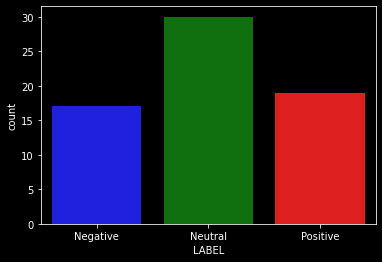

In [ ]:
import seaborn as sns
sns.countplot(x=df_process["LABEL"], data=df, palette=['Blue',"Green","Red"])

In [ ]:
df_process.to_csv("ADRO SENTIMENT.csv")

---